In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 1s 0us/step


[5 0 4 1 9 2 1 3 1 4]


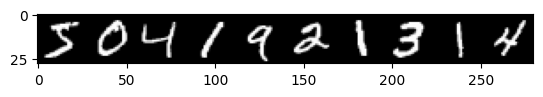

In [3]:
import matplotlib.pyplot as plt
import numpy as np

img = np.hstack(x_train[:10])
plt.imshow(img, cmap='gray')
print(y_train[:10])

In [4]:
len(y_train), len(y_test), np.unique(y_train, return_counts=True)

(60000,
 10000,
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
        dtype=int64)))

In [5]:
np.shape(x_train), np.shape(x_test)

((60000, 28, 28), (10000, 28, 28))

x, y 데이터를 훈련/테스트로 나누어진 데이터를 array로 받음  
사진 데이터를 로드, 사이즈 통일, 어레이로 하고, 레이블 변환 X  
지도학습 진행, 사진을 넣으면 0~9의 10개 중 어떤 카테고리인지 분류 => 다항분류 문제  
=> 다항분류는 반드시 원핫 인코딩 되어있는 자료 넣거나 모델에서 원핫 인코딩 시켜야 함  

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax') # softmax는 다항분류에 사용하는 활성화 함수
])

# 기본적으로 softmax는 categorical_crossentropy 함수 사용하는데
# 입력값이 원핫 인코딩 되어있지 않으면 sparse_categorical_crossentropy 라고 지정하여 사용하면
# 알아서 원핫 인코딩 진
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.0282076 , -0.00396934,  0.0414409 , ...,  0.07115852,
         -0.04343349,  0.07966786],
        [-0.0522376 , -0.00330575,  0.00233274, ..., -0.02085299,
          0.03193247, -0.00514196],
        [-0.04045534,  0.05671919, -0.03980754, ..., -0.0627785 ,
         -0.06501853,  0.02184978],
        ...,
        [-0.05577728, -0.04604045, -0.07315977, ...,  0.05862027,
          0.02871981, -0.06223496],
        [-0.00014094, -0.0451178 , -0.0037261 , ...,  0.04700109,
         -0.0615693 ,  0.00388547],
        [-0.08031923, -0.04298945,  0.05130977, ...,  0.0418674 ,
          0.05717859,  0.04552042]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(x_train, y_train, epochs=20, validation_data=(x_train, y_train), batch_size=100)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3656 - accuracy: 0.8968 - val_loss: 0.1725 - val_accuracy: 0.9510
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1742 - accuracy: 0.9489 - val_loss: 0.1152 - val_accuracy: 0.9672
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1309 - accuracy: 0.9618 - val_loss: 0.0860 - val_accuracy: 0.9753
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1077 - accuracy: 0.9683 - val_loss: 0.0670 - val_accuracy: 0.9808
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0906 - accuracy: 0.9730 - val_loss: 0.0574 - val_accuracy: 0.9833
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0794 - accuracy: 0.9758 - val_loss: 0.0466 - val_accuracy: 0.9866
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0707 - accuracy: 0.9783 - val_loss: 0.0408 - val_accuracy: 0.9881
Epoch 

In [10]:
hist.history

{'loss': [0.3656429648399353,
  0.17415960133075714,
  0.13091562688350677,
  0.10767225921154022,
  0.09058886021375656,
  0.07944796234369278,
  0.0706992894411087,
  0.06362764537334442,
  0.05625376105308533,
  0.052279070019721985,
  0.048193156719207764,
  0.04339996725320816,
  0.04000356048345566,
  0.03798285499215126,
  0.03510532155632973,
  0.03311074525117874,
  0.029628237709403038,
  0.029701175168156624,
  0.028085574507713318,
  0.02710820734500885],
 'accuracy': [0.8968499898910522,
  0.9488666653633118,
  0.961816668510437,
  0.9683333039283752,
  0.9729666709899902,
  0.9757833480834961,
  0.9782666563987732,
  0.9802333116531372,
  0.9821500182151794,
  0.9828166961669922,
  0.9841499924659729,
  0.9858499765396118,
  0.9868500232696533,
  0.9881500005722046,
  0.9882833361625671,
  0.9892833232879639,
  0.9900166392326355,
  0.9897666573524475,
  0.9905666708946228,
  0.9908166527748108],
 'val_loss': [0.1725141704082489,
  0.1151750460267067,
  0.0860252976417541

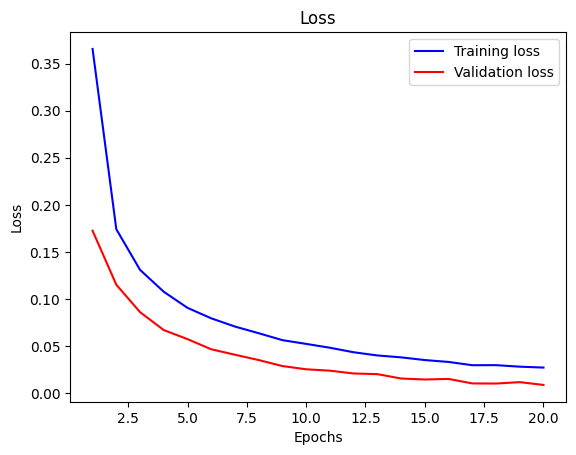

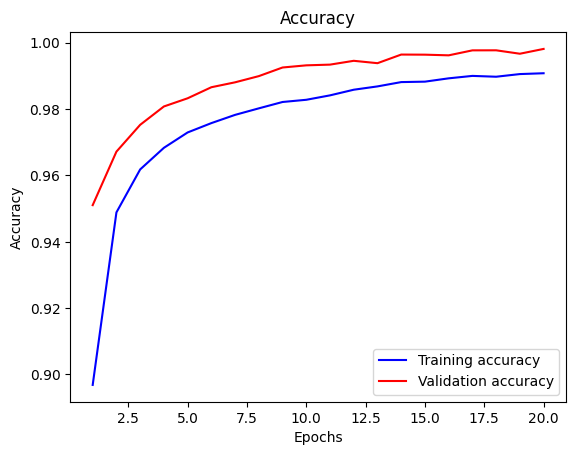

In [11]:
loss = hist.history['loss']
accuracy = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']

# 에포크 수
epochs = range(1, len(loss) + 1)

# 손실 그래프
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
model.save('mnist.h5')

우리가 만든 것 - 손글씨 분류 모델  
1. 손글씨 0~9까지 카테고리 분류하는 비전 모델  
2. 학습 시에 28*28의 검은 배경, 흑백 이미지 학습함
3. 원핫인코딩 하지 않고 y값을 학습하여 모델에서 원핫인코딩 함

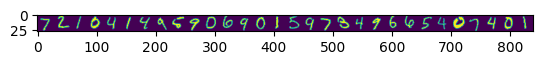

In [24]:
### 테스트 데이터로 모델 확인하기 - 분류평가지표로 확인해야하지만 일단 생략하고 plt로 확인해보기
model = tf.keras.models.load_model('./mnist.h5')
testData = x_test[:30]
preds = model(testData)
result = tf.nn.softmax(preds)

plt.imshow(np.hstack(testData))

In [25]:
num = np.argmax(result, axis=1)
num

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1], dtype=int64)

In [8]:
class TrieNode:
    def __init__(self, val):
        self.child = [None] * 10
        self.is_leaf = True
        self.val = val

    def insert(self, string, idx):
        if len(string) == idx:
            return
        cur_char = string[idx]
        cur_char_idx = int(cur_char)
        if self.child[cur_char_idx] is None or self.is_leaf:
            self.child[cur_char_idx] = TrieNode(cur_char)
            self.is_leaf = False
        self.child[cur_char_idx].insert(string, idx + 1)

    def is_consistency(self, string, idx):
        if len(string) == idx:
            return self.is_leaf
        cur_char_idx = int(string[idx])
        if not self.is_leaf:
            if self.child[cur_char_idx] is not None:
                return self.child[cur_char_idx].is_consistency(string, idx + 1)
        return False

class Trie:
    def __init__(self):
        self.root = TrieNode(' ')

    def insert(self, string):
        self.root.insert(string, 0)

    def is_consistency(self, string):
        return self.root.is_consistency(string, 0)

if __name__ == "__main__":
    t = int(input())
    for _ in range(t):
        n = int(input())
        num_list = []
        trie = Trie()
        for _ in range(n):
            string = input()
            num_list.append(string)
            trie.insert(string)
        res = all(trie.is_consistency(num) for num in num_list)
        print("YES" if res else "NO")


NO


ValueError: invalid literal for int() with base 10: ''